# Code for Stochatic parameter shift rule with Tomography

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqix import *
import stoc.bases
import stoc.fishers
import stoc.stocf
import stoc.quench

import statistics 
import random

In [2]:
# Pauli matrices # from tqix
sx = sigmax()
sy = sigmay()
sz = sigmaz()
si = eyex(2)
u = obasis(2,0)
d = obasis(2,1)
psi1 = u
psi2 = (u+d)/np.sqrt(2)
psi3 = (u+1j*d)/np.sqrt(2)

In [4]:
# Define Hamilotnian
H0 = dotx(psi1,daggx(psi1))
H1 = dotx(psi2,daggx(psi2))
H2 = dotx(psi3,daggx(psi3))
opers = [H0, H1, H2]
#params = [-0.1, 0.2, 0.1]

p = 20
d = len(params)
ps = []
results = []
means = []
stds = []

for i in range(d-1,p):
    ps.append(i)
    for j in range(10):
        params = [random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)]
        result = stoc.quench.quench(i, opers, params)
        results.append(np.real(result))
        
    means.append(statistics.mean(results))
    stds.append(statistics.stdev(results))
    
    print(i,statistics.mean(results),statistics.stdev(results))

#save
np.savetxt('data/means_stoc.out', means, delimiter=',')
np.savetxt('data/stds_stoc.out', means, delimiter=',')

2 0.9455855261316244 1.4245281933436704
3 0.6683948962047941 1.0330128835134833
4 0.5154736874083159 0.8650780134510498
5 0.4202816990547609 0.7645011007748088
6 0.3634917434377377 0.6916947193011256
7 0.32114135343561623 0.6376045105564299
8 0.2879850858094863 0.595262803093591
9 0.2609471601327228 0.5609603360749433
10 0.23919093542079517 0.5321434556348362
11 0.22184595807483964 0.5072589263483439
12 0.20654491803978905 0.4858708046365895
13 0.1936340228462776 0.4669944069359455
14 0.18233154288104353 0.4502493916307611
15 0.17235632312412633 0.435254426064256
16 0.16343794205385329 0.4217268376741605
17 0.15546211126672926 0.4094250354979147
18 0.1483395031173297 0.39815498026032703
19 0.14172615749075862 0.3878398112561017


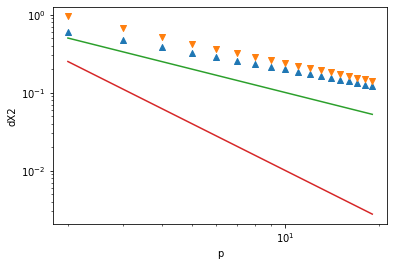

In [11]:
cmap = plt.get_cmap("tab10")

sql = []
hl = []

for i in ps:
    sql.append(1.0/i)
    hl.append(1.0/(i*i))


#plt.scatter(ps,means,linestyle='-', marker='o')
plt.scatter(ps,means_inf,linestyle='-', marker='^')
plt.scatter(ps,means_stoc,linestyle='-', marker='v')

plt.plot(ps,sql, '-',color=cmap(2))
plt.plot(ps,hl, '-',color=cmap(3))

plt.xlabel("p")
plt.ylabel("dX2")
plt.xscale("log")
plt.yscale("log")


plt.savefig('data/fig_quench20ave.eps', format = 'eps', dpi=600)
plt.show()

In [8]:
#call file to plot above figure
means_inf = np.loadtxt('data/means_inf.out',delimiter=',')
stds_inf = np.loadtxt('data/stds_inf.out',delimiter=',')
means_stoc = np.loadtxt('data/means_stoc.out',delimiter=',')
stds_stoc = np.loadtxt('data/stds_stoc.out',delimiter=',')